

- Lire les définitions des variables
- Trouver une idée d'application 
- Filtrer le jeu de données 
- Traiter les valeurs aberrantes
- Traiter les valeurs manquantes : utiliser le KNN (sensible aux outliers), Iterative imputer (les variables doivent être corrélé entre elle


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
data = pd.read_csv('Cleaned/exploratory_data_analisis.csv')
data2 = pd.read_csv('Cleaned/exploratory_data_analisis2.csv')
data.columns
data.drop(columns='Unnamed: 0',inplace = True)
data2.drop(columns='Unnamed: 0', inplace = True)


Le calcul du score est basé sur des données nutritionnelles pour 100 grammes de produit, dont les nutriments font partie de la déclaration nutritionnelle obligatoire ou qui peuvent la compléter (dans le respect de l’article 30 du règlement « INCO » n° 1169/2011), soit :

 - La valeur énergétique ;
 - La quantité de lipides ;
 - La quantité d’acides gras saturés ;
 - La quantité de glucides ;
 - La quantité de sucres ;
 - La quantité de protéines ;
 - La quantité de sel ;
 - Les fibres.

Combler le nutriscore en fonction de la catégorie 

Les additifs alimentaires :

Les adddtifs sont des substances que l'on ajoute soit pour rehausser le goût, donner une couleur à l'aliment, conserver plus longtemps les aliments, donner une texture à l'aliment et maintenir la qualité d'un produit. 

Il existe cinq grandes familles d'additifs alimentaires :  

 - les colorants, ils permettent de donner une couleur attirante au produit (de E100 à E199) ;
 - les conservateurs (E200 à E299), ils sont indispensables car ils empêchent la prolifération des moisissures ;
 - les antioxydants (E300), ils empêchent les fruits de foncer ;
 - les agents de texture (E400), ils donnent son aspect à un produit ;
 - les exhausteurs de goût (E600) qui intensifient le goût d'un produit.



In [4]:
data2

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.00,10.40,NaN,0.000,0.1000,10.40
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37816,http://world-fr.openfoodfacts.org/produit/9606...,Sugary snacks,Spearmint sans sucres,en:france,"Ãdulcorants : sorbitol, sucralose, acÃ©sulfam...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",c,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37817,http://world-fr.openfoodfacts.org/produit/9611...,Sugary snacks,Fisherman's Friend Miel-Citron,en:france,"Ãdulcorants : sorbitols, sucralose, acÃ©sulfa...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",b,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37818,http://world-fr.openfoodfacts.org/produit/9778...,Salty snacks,Nature cheddar and red onion crisps,"en:france,en:united-kingdom",NaN,NaN,c,9.0,2155.0,NaN,3.40,NaN,5.600,7.800,1.3500,1.80
37819,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


https://world-fr.openfoodfacts.org/produit/87177756/7up-7-up#panel_nutriscore

Exemple du Calcul du nutri-score sur le site web open food fact pour la boisson 7up

Points positifs : 0

- Protéines : 0 / 5 (valeur : 0, valeur arrondie : 0)
- Fibre : 0 / 5 (valeur : 0, valeur arrondie : 0)
- Fruits, légumes, noix et huiles de colza / noix / olive : 0 / 10 (valeur : 0, valeur arrondie : 0)

Points négatifs : 10

- Énergie : 5 / 10 (valeur : 126, valeur arrondie : 126)
- Sucres : 5 / 10 (valeur : 7.3, valeur arrondie : 7.3)
- Graisses saturées : 0 / 10 (valeur : 0, valeur arrondie : 0)
- Sodium : 0 / 10 (valeur : 16, valeur arrondie : 16)

Score nutritionnel : 10 (10 - 0)

### Liste d'aliments caloriques

- 1	huile d'avocat	900,00 kcal
- 2	huile de colza	900,00 kcal
- 3	huile de foie de morue	900,00 kcal
- 4	huile de noisette	900,00 kcal
- 5	huile de noix	900,00 kcal
- 6	huile de poisson	900,00 kcal
- 7	huile de tournesol	900,00 kcal
- 8	mélange d'huile d'olive et de graines	900,00 kcal
- 9	pain de friture	900,00 kcal
- 10	saindoux	900,00 kcal
- 11	huile d'argan	899,00 kcal
- 12	huile d'olive vierge	899,00 kcal
- 13	huile de pépins de raisin	899,00 kcal
- 14	huile de sésame	899,00 kcal
- 15	huile de soja	899,00 kcal
- 16	huile végétale (aliment moyen)	899,00 kcal
- 17	mélange d'huiles	899,00 kcal
- 18	graisse d'oie	898,00 kcal
- 19	graisse de canard	898,00 kcal
- 20	huile de maïs	897,00 kcal
- 21	huile d'arachide	895,00 kcal
- 22	margarine (80% mg) en pain	761,00 kcal
- 23	beurre doux	745,00 kcal
- 24	noix de pécan	739,00 kcal
- 25	margarine (80% mg) au tournesol en barquette	735,00 kcal
- 26	noix de macadamia	734,00 kcal
- 27	beurre demi-sel	732,00 kcal
- 28	mayonnaise	727,00 kcal
- 29	mayonnaise (70% mg min.)	712,00 kcal
- 30	noix du Brésil	705,00 kcal
- 31	noix	698,00 kcal
- 32	pignon de pin	695,00 kcal
- 33	noisette	683,00 kcal
- 34	noix de coco, amande sèche	683,00 kcal
- 35	lard cru	654,00 kcal
- 36	vinaigrette à l'huile d'olive	650,00 kcal
- 37	graine de sésame	644,00 kcal
- 38	graine de tournesol	642,00 kcal
- 39	cacahuète	636,00 kcal
- 40	amande	634,00 kcal
- 41	matière grasse (70% mg) en pain	634,00 kcal
- 42	noix de cajou	631,00 kcal
- 43	cacahuète grillée et salée	613,00 kcal
- 44	pistache	604,00 kcal
- 45	beurre de cacahuète	586,00 kcal
- 46	chocolat noir (70% cacao minimum) en tablette	572,00 kcal
- 47	croûtons	564,00 kcal
- 48	pâte feuilletée pur beurre	564,00 kcal
- 49	beurre allégé (60% mg)	562,00 kcal
- 50	matière grasse (55-60% mg) allégée enrichie en stérols/stanols	558,00 kcal
- 51	chocolat au lait aux fruits secs en tablette	556,00 kcal
- 52	chocolat noir aux fruits secs en tablette	553,00 kcal
- 53	chocolat blanc en tablette	551,00 kcal
- 54	barre goûter au lait et chocolat	550,00 kcal
- 55	chocolat noir (70% cacao) sans sucres ajoutés en tablette	546,00 kcal
- 56	chocolat au lait en tablette	545,00 kcal
- 57	crackers au fromage	544,00 kcal
- 58	tarama	544,00 kcal
- 59	matière grasse allégée (composée à 60% mg) demi-sel	542,00 kcal
- 60	matière grasse (60% mg) allégée	540,00 kcal
- 61	matière grasse allégée (composée à 60% mg)	536,00 kcal
- 62	beurre allégé demi-sel (60% mg)	532,00 kcal
- 63	chocolat au lait aux céréales en tablette	532,00 kcal
- 64	chips de crevette	529,00 kcal
- 65	pâte à tartiner chocolat et noisette	527,00 kcal
- 66	chocolat noir (40% de cacao minimum) en tablette	526,00 kcal
- 67	gaufrettes fourrées (chocolat, vanille, noisette, etc.)	524,00 kcal
- 68	palmier	522,00 kcal
- 69	biscuits apéritifs soufflés à base de maïs (sans cacahuète)	518,00 kcal
- 70	sauce pesto	517,00 kcal
- 71	matière grasse (55-60% mg) allégée riche en oméga 3 et 6	516,00 kcal
- 72	biscuits secs feuilletés, palmiers	515,00 kcal
- 73	cacahuètes enrobées de chocolat	514,00 kcal
- 74	tuiles apéritif salées	513,00 kcal
- 75	foie gras (conserve)	511,00 kcal
- 76	bonbon au chocolat dragéifié	505,00 kcal
- 77	pâte brisée	505,00 kcal
- 78	pâte feuilletée	505,00 kcal
- 79	cookies aux pépites de chocolat	504,00 kcal
- 80	biscuits secs nappés au chocolat	503,00 kcal
- 81	fruits secs (aliment moyen)	499,00 kcal
- 82	béarnaise	496,00 kcal
- 83	tortilla chips	496,00 kcal
- 84	barre chocolatée aux fruits secs	494,00 kcal
- 85	biscuits secs avec tablette de chocolat	493,00 kcal
- 86	mélange apéritif de graines salées et raisins secs	492,00 kcal
- 87	lait en poudre entier	491,00 kcal
- 88	biscuits secs chocolatés, préemballés (pocket)	490,00 kcal
- 89	barre chocolatée biscuitée	487,00 kcal
- 90	chips salées	487,00 kcal
- 91	rocher coco	486,00 kcal
- 92	sablé au beurre	486,00 kcal
- 93	foie gras de canard (conserve)	485,00 kcal
- 94	sablé	484,00 kcal
- 95	crackers nature	483,00 kcal
- 96	salami	482,00 kcal
- 97	barre à la noix de coco enrobée de chocolat	481,00 kcal
- 98	goûters fourrés au lait ou à la vanille	480,00 kcal
- 99	chorizo	477,00 kcal
- 100	biscuits secs à teneur enrichis en vitamines et minéraux	476,00 kcal

In [5]:
data[data['sugars_100g']> 10].iloc[0:3,0:1].values

array([['http://world-fr.openfoodfacts.org/produit/0000040608754/pepsi-nouveau-gout'],
       ['http://world-fr.openfoodfacts.org/produit/0000087177756/7up'],
       ['http://world-fr.openfoodfacts.org/produit/000010/madeleines-nature-bijou']],
      dtype=object)

In [6]:
data.shape

(49805, 16)

In [7]:
data.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.004999
countries_tags             0.000000
ingredients_text           0.157334
additives_fr               0.523000
nutrition_grade_fr         0.240618
nutrition-score-fr_100g    0.240618
energy_100g                0.193575
fat_100g                   0.236442
saturated-fat_100g         0.227547
carbohydrates_100g         0.244473
fiber_100g                 0.497882
proteins_100g              0.197771
salt_100g                  0.225198
sugars_100g                0.225841
dtype: float64

<AxesSubplot:>

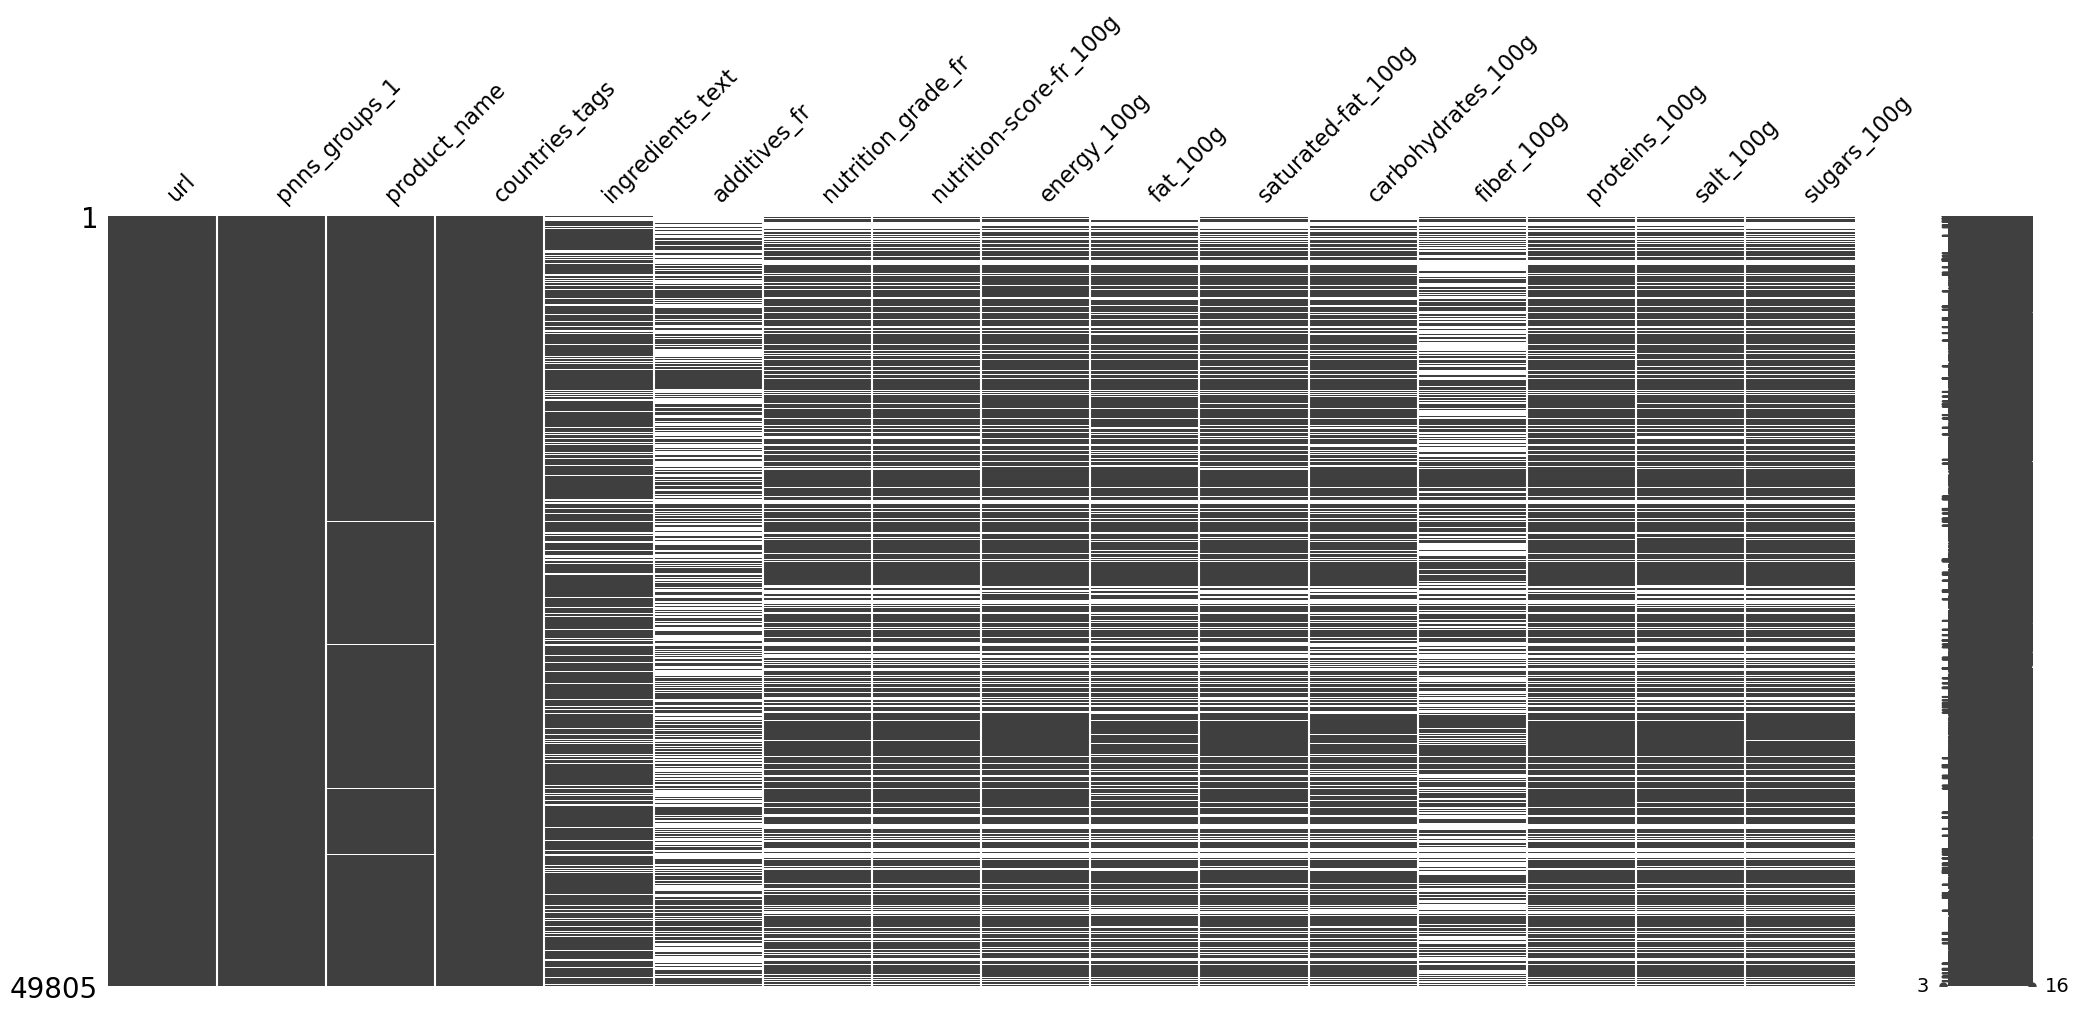

In [8]:
msno.matrix(data)

In [9]:
#for fib_cat in data['pnns_groups_1'].unique():
#    fiber_categ = data.loc[data['pnns_groups_1'] == fib_cat,'fiber_100g']
#    print(f'fiber categori {fib_cat},  fiber median {fiber_categ.median()}, fiber mean NaN : {fiber_categ.isna().mean()}')
#    tab_fiber = []
#    [tab_fiber.append(idx) for idx,i in zip(fiber_categ.isna().index,fiber_categ.isna()) if i == True]
#    data.loc[tab_fiber,'fiber_100g'] = fiber_categ.median()

In [10]:
cols = data.columns[7:]
cols
pnns_groups_1 = data['pnns_groups_1'].unique()
pnns_groups_1[:]


array(['Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [11]:
data.loc[data['pnns_groups_1'] == 'Cereals and potatoes']

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,http://world-fr.openfoodfacts.org/produit/0016...,Cereals and potatoes,Lucky Charms,"en:france,en:united-states","Whole Grain Oats, Sugar, Oat Flour, Corn Syrup...","E428 - GÃ©latine,E339iii - Phosphate de sodium...",d,14.0,1700.0,3.70,0.000,81.5,7.41,7.41,1.60,37.00
84,http://world-fr.openfoodfacts.org/produit/0018...,Cereals and potatoes,Macaroni N' Cheese,"en:france,en:united-states","ENRICHED MACARONI (_WHEAT_ FLOUR, NIACIN, IRON...","E375 - Acide nicotinique,E101 - Riboflavine,E3...",c,9.0,1420.0,1.41,0.705,70.5,2.82,11.30,2.04,7.05
109,http://world-fr.openfoodfacts.org/produit/0024...,Cereals and potatoes,Fusilli no.34,"en:france,en:united-states","Durum (_wheat_) semolina, niacin, ferrous lact...","E375 - Acide nicotinique,E585 - Lactate ferreu...",a,-6.0,1490.0,1.79,0.000,73.2,3.57,12.50,0.00,1.79
111,http://world-fr.openfoodfacts.org/produit/0026...,Cereals and potatoes,Pain Soft White Farmhouse,"en:france,en:united-kingdom",Farine de _blÃ©_ contenant du _gluten_ (farine...,"E170 - Carbonate de calcium,E375 - Acide nicot...",a,-2.0,1080.0,4.00,1.300,44.0,3.50,9.20,0.75,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49771,http://world-fr.openfoodfacts.org/produit/9556...,Cereals and potatoes,Nouilles instantanÃ©es,en:france,"Farine de _blÃ©_, huile de palme, sel, sels mi...","E500 - Carbonates de sodium,E501 - Carbonates ...",b,1.0,911.0,8.10,4.000,30.0,1.80,5.10,0.40,1.10
49785,http://world-fr.openfoodfacts.org/produit/9556...,Cereals and potatoes,Mantou Sandwich,en:france,"Farine de _blÃ©_ (55.35%), eau (26.6%), sucre,...",NaN,b,2.0,1218.0,2.00,1.000,60.0,0.30,8.00,0.06,14.00
49786,http://world-fr.openfoodfacts.org/produit/9556...,Cereals and potatoes,Mini Paratha,en:france,"Farine de _blÃ©_ (52%), eau, huile de palme, s...",E500 - Carbonates de sodium,c,10.0,1309.0,15.00,9.000,41.4,6.50,6.00,0.90,5.10
49790,http://world-fr.openfoodfacts.org/produit/959/...,Cereals and potatoes,3 petits pains multicÃ©rÃ©ales,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.loc[data['pnns_groups_1'] == 'cereals-and-potatoes','pnns_groups_1']  = 'Cereals and potatoes'

In [13]:
# pour chaque val manquante de la variable fiber, on remplace les valeurs par la mediane de la categorie du produit
new_data = data.copy()
for col_nutriment in cols:
    for nutri_categ in data['pnns_groups_1'].unique():
        nutri_media_categ = data.loc[data['pnns_groups_1'] == nutri_categ,col_nutriment]
        print(f' {col_nutriment} categori {nutri_categ},  {col_nutriment} median {nutri_media_categ.median()}, {col_nutriment} mean NaN : {nutri_media_categ.isna().mean()}')
        tab_nutriment = []
        [tab_nutriment.append(idx) for idx,i in zip(nutri_media_categ.isna().index,nutri_media_categ.isna()) if i == True]
        new_data.loc[tab_nutriment,col_nutriment] = nutri_media_categ.median()
    print(f'avant del tab {tab_nutriment}')
    del tab_nutriment
    #print(f'après del tab {tab_nutriment}')


 nutrition-score-fr_100g categori Cereals and potatoes,  nutrition-score-fr_100g median -1.0, nutrition-score-fr_100g mean NaN : 0.1623497545285255
 nutrition-score-fr_100g categori Sugary snacks,  nutrition-score-fr_100g median 19.0, nutrition-score-fr_100g mean NaN : 0.22108345534407028
 nutrition-score-fr_100g categori Beverages,  nutrition-score-fr_100g median 6.0, nutrition-score-fr_100g mean NaN : 0.3318618950023648
 nutrition-score-fr_100g categori Fish Meat Eggs,  nutrition-score-fr_100g median 5.0, nutrition-score-fr_100g mean NaN : 0.3291445142580957
 nutrition-score-fr_100g categori Composite foods,  nutrition-score-fr_100g median 2.0, nutrition-score-fr_100g mean NaN : 0.16573590344082148
 nutrition-score-fr_100g categori Fruits and vegetables,  nutrition-score-fr_100g median -3.0, nutrition-score-fr_100g mean NaN : 0.3283433133732535
 nutrition-score-fr_100g categori Milk and dairy products,  nutrition-score-fr_100g median 10.0, nutrition-score-fr_100g mean NaN : 0.2017871

In [14]:
# pour chaque val manquante de la variable fiber, on remplace les valeurs par la mediane de la categorie du produit
new_data2 = data2.copy()
print(len(new_data.iloc[:,0:1]))
for col_nutriment in cols:

    for nutri_categ in data['pnns_groups_1'].unique():
        nutri_media_categ = data2.loc[data2['pnns_groups_1'] == nutri_categ,col_nutriment]
        print(f' {col_nutriment} categori {nutri_categ},  {col_nutriment} median {nutri_media_categ.median()}, {col_nutriment} mean NaN : {nutri_media_categ.isna().mean()}')
        tab_nutriment2 = []
        [tab_nutriment2.append(idx2) for idx2,j in zip(nutri_media_categ.isna().index,nutri_media_categ.isna()) if j == True]
        new_data2.loc[tab_nutriment2,col_nutriment] = nutri_media_categ.median()
    print(f'avant del tab {tab_nutriment2}')
    del tab_nutriment2
    #print(f'après del tab {tab_nutriment}')

49805
 nutrition-score-fr_100g categori Cereals and potatoes,  nutrition-score-fr_100g median -1.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Sugary snacks,  nutrition-score-fr_100g median 19.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Beverages,  nutrition-score-fr_100g median 6.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Fish Meat Eggs,  nutrition-score-fr_100g median 5.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Composite foods,  nutrition-score-fr_100g median 2.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Fruits and vegetables,  nutrition-score-fr_100g median -3.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Milk and dairy products,  nutrition-score-fr_100g median 10.0, nutrition-score-fr_100g mean NaN : 0.0
 nutrition-score-fr_100g categori Salty snacks,  nutrition-score-fr_100g median 13.0, nutri

In [15]:
data.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.004999
countries_tags             0.000000
ingredients_text           0.157334
additives_fr               0.523000
nutrition_grade_fr         0.240618
nutrition-score-fr_100g    0.240618
energy_100g                0.193575
fat_100g                   0.236442
saturated-fat_100g         0.227547
carbohydrates_100g         0.244473
fiber_100g                 0.497882
proteins_100g              0.197771
salt_100g                  0.225198
sugars_100g                0.225841
dtype: float64

In [16]:
new_data.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.004999
countries_tags             0.000000
ingredients_text           0.157334
additives_fr               0.523000
nutrition_grade_fr         0.240618
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sugars_100g                0.000000
dtype: float64

In [17]:
new_data2.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.002380
countries_tags             0.000000
ingredients_text           0.113852
additives_fr               0.463578
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sugars_100g                0.000000
dtype: float64

In [18]:
new_data2

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.00,10.40,0.100,0.000,0.1000,10.40
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37816,http://world-fr.openfoodfacts.org/produit/9606...,Sugary snacks,Spearmint sans sucres,en:france,"Ãdulcorants : sorbitol, sucralose, acÃ©sulfam...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",c,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37817,http://world-fr.openfoodfacts.org/produit/9611...,Sugary snacks,Fisherman's Friend Miel-Citron,en:france,"Ãdulcorants : sorbitols, sucralose, acÃ©sulfa...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",b,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37818,http://world-fr.openfoodfacts.org/produit/9778...,Salty snacks,Nature cheddar and red onion crisps,"en:france,en:united-kingdom",NaN,NaN,c,9.0,2155.0,30.3,3.40,51.00,5.600,7.800,1.3500,1.80
37819,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


## Valeur Abérante


<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

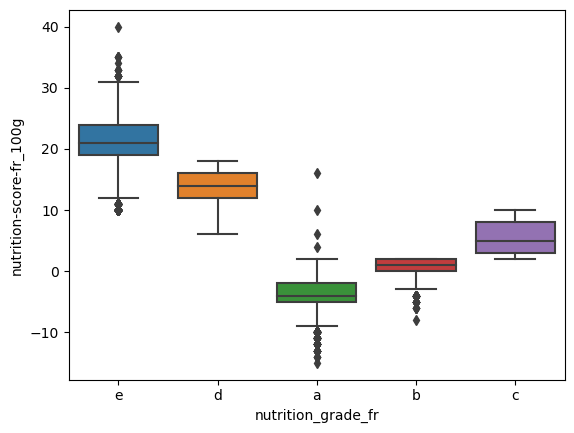

In [19]:
sns.boxplot(data= new_data,y='nutrition-score-fr_100g',x='nutrition_grade_fr')

In [21]:
nutriscore = new_data.loc[new_data['nutrition_grade_fr'] == 'a']
Nutri_A_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=False).iloc[0:10]
Nutri_A_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
6494,http://world-fr.openfoodfacts.org/produit/3057...,Beverages,Volvic Limette,"en:france,en:switzerland","Eau minÃ©rale naturelle Volvic (95%), sucre, a...","E330 - Acide citrique,E212 - Benzoate de potas...",a,16.0,205.0,0.0,0.0,4.9,0.0,0.0,0.010000,12.4
6700,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,Evian,en:france,EAU MINERALE NATUURLIJK MINER,NaN,a,10.0,2787.0,0.0,0.0,0.0,0.1,0.0,0.000000,0.0
47315,http://world-fr.openfoodfacts.org/produit/8024...,Beverages,Courmayeur,en:france,Eau minÃ©rale naturelle,NaN,a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.524000,0.0
23585,http://world-fr.openfoodfacts.org/produit/3271...,Beverages,SÃ©millante arÃ´mes naturels Citron,en:france,"Eau de la source SÃ©millante (97,6%), Pur s...","E330 - Acide citrique,E242 - Dicarbonate de di...",a,4.0,36.0,0.0,0.0,2.1,0.1,0.0,0.005000,2.0
36912,http://world-fr.openfoodfacts.org/produit/3596...,Beverages,Source St Jean,en:france,NaN,NaN,a,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.460000,0.0
9941,http://world-fr.openfoodfacts.org/produit/3179...,Beverages,"Perrier citron vert, limoen",en:france,"eau minÃ©rale naturelle Perrier (99.9%), arÃ´m...",NaN,a,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6748,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,La Salvetat Citron,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e La Salveta...,NaN,a,1.0,2.0,0.0,0.0,0.0,0.1,0.0,0.010008,0.0
6697,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,Sans sucres Agrumes,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e Ã la Salv...,NaN,a,1.0,1.0,0.0,0.0,0.0,0.1,0.0,0.010000,0.0
2643,http://world-fr.openfoodfacts.org/produit/2065...,Beverages,PÃ©tillante saveur Citron,en:france,"Eau minÃ©rale naturelle gazÃ©ifiÃ©e, arÃ´me na...",NaN,a,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.007000,0.0
6708,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,La Salvetat Citron vert,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e La Salveta...,NaN,a,1.0,3.0,0.0,0.0,0.0,0.1,0.0,0.010000,0.0


In [22]:
new_data.loc[6494,'nutrition_grade_fr'] = 'd'
new_data.loc[6494,'nutrition-score-fr_100g'] = 7
new_data.loc[6700,'nutrition-score-fr_100g'] = 0

new_data.loc[47315,'nutrition-score-fr_100g'] = 0
new_data.loc[23585,'nutrition_grade_fr'] = 'c'

new_data.loc[36912,'nutrition-score-fr_100g'] = 0
new_data.loc[9941,'nutrition_grade_fr'] = 'b'
new_data.loc[6748,'nutrition_grade_fr'] = 'b'
new_data.loc[6697,'nutrition_grade_fr'] = 'b'
new_data.loc[2643,'nutrition_grade_fr'] = 'b'
new_data.loc[6708,'nutrition_grade_fr'] = 'b'


In [23]:
nutriscore = new_data2.loc[new_data2['nutrition_grade_fr'] == 'a']
Nutri_A_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=False).iloc[0:10]
Nutri_A_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
4680,http://world-fr.openfoodfacts.org/produit/3057...,Beverages,Volvic Limette,"en:france,en:switzerland","Eau minÃ©rale naturelle Volvic (95%), sucre, a...","E330 - Acide citrique,E212 - Benzoate de potas...",a,16.0,205.0,0.0,0.0,4.9,0.0,0.0,0.010000,12.4
4817,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,Evian,en:france,EAU MINERALE NATUURLIJK MINER,NaN,a,10.0,2787.0,0.0,0.0,0.0,0.1,0.0,0.000000,0.0
36026,http://world-fr.openfoodfacts.org/produit/8024...,Beverages,Courmayeur,en:france,Eau minÃ©rale naturelle,NaN,a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.524000,0.0
18527,http://world-fr.openfoodfacts.org/produit/3271...,Beverages,SÃ©millante arÃ´mes naturels Citron,en:france,"Eau de la source SÃ©millante (97,6%), Pur s...","E330 - Acide citrique,E242 - Dicarbonate de di...",a,4.0,36.0,0.0,0.0,2.1,0.1,0.0,0.005000,2.0
28329,http://world-fr.openfoodfacts.org/produit/3596...,Beverages,Source St Jean,en:france,NaN,NaN,a,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.460000,0.0
7313,http://world-fr.openfoodfacts.org/produit/3179...,Beverages,"Perrier citron vert, limoen",en:france,"eau minÃ©rale naturelle Perrier (99.9%), arÃ´m...",NaN,a,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4834,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,La Salvetat Citron,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e La Salveta...,NaN,a,1.0,2.0,0.0,0.0,0.0,0.1,0.0,0.010008,0.0
4816,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,Sans sucres Agrumes,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e Ã la Salv...,NaN,a,1.0,1.0,0.0,0.0,0.0,0.1,0.0,0.010000,0.0
1678,http://world-fr.openfoodfacts.org/produit/2065...,Beverages,PÃ©tillante saveur Citron,en:france,"Eau minÃ©rale naturelle gazÃ©ifiÃ©e, arÃ´me na...",NaN,a,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.007000,0.0
4818,http://world-fr.openfoodfacts.org/produit/3068...,Beverages,La Salvetat Citron vert,en:france,Eau minÃ©rale naturelle gazÃ©ifiÃ©e La Salveta...,NaN,a,1.0,3.0,0.0,0.0,0.0,0.1,0.0,0.010000,0.0


In [24]:
new_data2.loc[4680,'nutrition_grade_fr'] = 'd'
new_data2.loc[4680,'nutrition-score-fr_100g'] = 7
new_data2.loc[4817,'nutrition-score-fr_100g'] = 0

new_data2.loc[36026,'nutrition-score-fr_100g'] = 0
new_data2.loc[18527,'nutrition_grade_fr'] = 'c'

new_data2.loc[28329,'nutrition-score-fr_100g'] = 0
new_data2.loc[4819,'nutrition_grade_fr'] = 'b'
new_data2.loc[4823,'nutrition_grade_fr'] = 'b'
new_data2.loc[4834,'nutrition_grade_fr'] = 'b'
new_data2.loc[7313,'nutrition_grade_fr'] = 'b'
new_data2.loc[4818,'nutrition_grade_fr'] = 'b'

In [25]:
Nutri_A_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/3057640406423/volvic-limette',
       'http://world-fr.openfoodfacts.org/produit/3068320055008/evian',
       'http://world-fr.openfoodfacts.org/produit/8024884501400/courmayeur',
       'http://world-fr.openfoodfacts.org/produit/3271330062939/semillante-aromes-naturels-citron-milles',
       'http://world-fr.openfoodfacts.org/produit/3596710336432/source-st-jean-auchan',
       'http://world-fr.openfoodfacts.org/produit/3179732368942/perrier-citron-vert-limoen',
       'http://world-fr.openfoodfacts.org/produit/3068320693002/la-salvetat-citron',
       'http://world-fr.openfoodfacts.org/produit/3068320019628/sans-sucres-agrumes-la-salvetat',
       'http://world-fr.openfoodfacts.org/produit/20656935/petillante-saveur-citron-soguaro',
       'http://world-fr.openfoodfacts.org/produit/3068320102993/la-salvetat-citron-vert'],
      dtype=object)

In [26]:
nutriscore = new_data.loc[new_data['nutrition_grade_fr'] == 'b']
Nutri_B_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True).iloc[0:10]
Nutri_B_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
1907,http://world-fr.openfoodfacts.org/produit/2016...,Beverages,Lord Nelson Kamille KrÃ¤utertee,en:france,Die Kamille ist seit Jahrhunderten wohlbekannt...,NaN,b,-8.0,4.0,0.00,0.00,0.2,0.1,0.00,0.000,0.10
33370,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,SpÃ©cialitÃ© au Citron,en:france,"Eau, jus de citron Ã base de concentrÃ©, jus ...",NaN,b,-6.0,82.0,0.00,0.00,1.5,0.1,0.50,0.000,0.90
13991,http://world-fr.openfoodfacts.org/produit/3250...,Beverages,jus de citron,en:france,"eau de source Saint BenoÃ®t (50%), jus de citr...","E330 - Acide citrique,E300 - Acide ascorbique",b,-6.0,71.0,0.50,0.10,1.0,0.1,0.50,0.010,1.00
12030,http://world-fr.openfoodfacts.org/produit/3227...,Beverages,Citrons fraÃ®chement pressÃ©s,en:france,"Jus de citron, mÃ©tabisulfite de potassium.",E224 - Disulfite de potassium,b,-6.0,53.0,0.10,0.01,2.5,0.1,0.44,0.004,2.00
41499,http://world-fr.openfoodfacts.org/produit/3770...,Beverages,Eau de coco,en:france,Eau de coco.,NaN,b,-6.0,70.0,0.20,0.10,3.0,0.1,0.70,0.120,1.10
47352,http://world-fr.openfoodfacts.org/produit/8031...,Beverages,Pulco cuisine citron vert,en:france,"jus de citron vert (57%), eau, acidifiant : ac...","E330 - Acide citrique,E224 - Disulfite de pota...",b,-6.0,79.0,0.02,0.00,10.0,0.0,0.23,0.000,1.14
11258,http://world-fr.openfoodfacts.org/produit/3222...,Beverages,100 % Pur Jus Tomate,en:france,"Jus de tomate, sel (3 g/l), jus de citron.",NaN,b,-5.0,56.0,0.10,0.00,2.7,0.1,0.60,0.300,2.70
22091,http://world-fr.openfoodfacts.org/produit/3266...,Beverages,jus de 7 lÃ©gumes,en:france,"Jus de tomates, jus de carottes, jus de better...",NaN,b,-5.0,59.0,0.05,0.01,2.4,0.8,0.60,0.630,2.40
35851,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,100 % pur jus tomate & lÃ©gumes,en:france,"Jus de tomate, jus de carotte, jus de _cÃ©leri...",NaN,b,-5.0,80.0,0.00,0.10,3.6,0.9,0.70,0.400,3.00
27180,http://world-fr.openfoodfacts.org/produit/3350...,Beverages,100 % Pur Jus Tomate,en:france,"Jus de tomate, sel (3 g/L), jus de citron.",NaN,b,-5.0,56.0,0.10,0.00,2.7,0.1,0.60,0.300,2.70


In [27]:
Nutri_B_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/20163112/lord-nelson-kamille-krautertee-lidl',
       'http://world-fr.openfoodfacts.org/produit/3560070735204/specialite-au-citron-carrefour',
       'http://world-fr.openfoodfacts.org/produit/3250390001614/jus-de-citron-paquito',
       'http://world-fr.openfoodfacts.org/produit/3227441299061/citrons-fraichement-presses-sicilia',
       'http://world-fr.openfoodfacts.org/produit/3770002316061/eau-de-coco-vaivai',
       'http://world-fr.openfoodfacts.org/produit/8031301883384/pulco-cuisine-citron-vert-polenghi',
       'http://world-fr.openfoodfacts.org/produit/3222473216321/100-pur-jus-tomate-casino',
       'http://world-fr.openfoodfacts.org/produit/3266191001289/jus-de-7-legumes-la-vie-claire',
       'http://world-fr.openfoodfacts.org/produit/3564707109628/100-pur-jus-tomate-legumes-bio-village',
       'http://world-fr.openfoodfacts.org/produit/3350031888724/100-pur-jus-tomate-monoprix'],
      dtype=object)

In [28]:
nutriscore = new_data.loc[new_data['nutrition_grade_fr'] == 'c']
Nutri_C_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True).iloc[0:10]
Nutri_C_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
49803,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.2,0.5,0.2,0.5,0.0254,0.50
30681,http://world-fr.openfoodfacts.org/produit/3464...,Beverages,Gel d'aloe vera Ã boire bio Ã©quitable,en:france,"Aloe Vera natif 99.39% bio, Ã©paississant (gom...","E415 - Gomme xanthane,E300 - Acide ascorbique",c,2.0,12.0,0.2,0.1,0.6,0.1,0.2,0.0500,0.05
31061,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh Cola ZÃ©ro,en:france,"Eau gazÃ©ifiÃ©e, colorant : caramel E150d, aci...","E150d - Caramel au sulfite d'ammonium,E338 - A...",c,2.0,3.0,0.5,0.5,0.5,0.1,0.5,0.0100,0.50
31069,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh cola sans sucre,en:france,NaN,NaN,c,2.0,13.0,0.0,0.5,10.0,0.0,0.5,0.0100,0.20
31070,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh Cola Sans Sucres,en:france,"Eau gazÃ©ifiÃ©e, colorant : caramel (E150d), a...","E150d - Caramel au sulfite d'ammonium,E338 - A...",c,2.0,3.0,0.5,0.5,0.5,0.1,0.5,0.0100,0.50
31358,http://world-fr.openfoodfacts.org/produit/3502...,Beverages,Ice Tea saveur pÃªche Zero Sucres,en:france,"Eau, extrait de thÃ© noir (1,4 g/l), acidifian...","E330 - Acide citrique,E296 - Acide malique,E33...",c,2.0,6.0,0.0,0.0,0.5,0.1,0.0,0.0300,0.50
31399,http://world-fr.openfoodfacts.org/produit/3502...,Beverages,Ice Tea saveur Fruits rouges,en:france,"eau, jus de rnÃ»re Ã base de concentrÃ© (0,36...","E330 - Acide citrique,E296 - Acide malique,E33...",c,2.0,6.0,0.0,0.0,0.5,0.1,0.0,0.0300,0.50
32094,http://world-fr.openfoodfacts.org/produit/3551...,Beverages,Limonade,en:france,NaN,NaN,c,2.0,8.0,0.0,0.5,10.0,0.0,0.5,0.0100,0.50
32249,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus d'orange Ã base de concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ©.,NaN,c,2.0,165.0,0.0,0.0,9.0,0.1,0.7,0.0000,9.00
32342,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus d'orange,en:france,Jus d'orange Ã base de concentrÃ©.,NaN,c,2.0,167.0,0.0,0.0,8.9,0.1,0.7,0.0000,8.20


In [29]:
Nutri_C_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/99111250/the-vert-earl-grey-lobodis',
       'http://world-fr.openfoodfacts.org/produit/3464660000638/gel-d-aloe-vera-a-boire-bio-equitable-pur-aloe',
       'http://world-fr.openfoodfacts.org/produit/3484700000817/breizh-cola-zero',
       'http://world-fr.openfoodfacts.org/produit/3484700007953/breizh-cola-sans-sucre',
       'http://world-fr.openfoodfacts.org/produit/3484700007977/breizh-cola-sans-sucres',
       'http://world-fr.openfoodfacts.org/produit/3502110005366/ice-tea-saveur-peche-zero-sucres-lipton',
       'http://world-fr.openfoodfacts.org/produit/3502110006967/ice-tea-saveur-fruits-rouges-lipton',
       'http://world-fr.openfoodfacts.org/produit/3551720035270/limonade-lorina',
       'http://world-fr.openfoodfacts.org/produit/3560070155804/jus-d-orange-a-base-de-concentre-carrefour',
       'http://world-fr.openfoodfacts.org/produit/3560070265398/jus-d-orange-saxo'],
      dtype=object)

In [30]:
nutriscore = new_data2.loc[new_data2['nutrition_grade_fr'] == 'c']
Nutri_C_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True).iloc[0:30]
Nutri_C_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
37820,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.20,0.5,0.2,0.50,0.0254,0.50
23410,http://world-fr.openfoodfacts.org/produit/3464...,Beverages,Gel d'aloe vera Ã boire bio Ã©quitable,en:france,"Aloe Vera natif 99.39% bio, Ã©paississant (gom...","E415 - Gomme xanthane,E300 - Acide ascorbique",c,2.0,12.0,0.2,0.10,0.6,0.1,0.20,0.0500,0.05
23668,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh Cola ZÃ©ro,en:france,"Eau gazÃ©ifiÃ©e, colorant : caramel E150d, aci...","E150d - Caramel au sulfite d'ammonium,E338 - A...",c,2.0,3.0,0.5,0.50,0.5,0.1,0.50,0.0100,0.50
23674,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh cola sans sucre,en:france,NaN,NaN,c,2.0,13.0,0.0,0.50,10.0,0.0,0.50,0.0100,0.20
23675,http://world-fr.openfoodfacts.org/produit/3484...,Beverages,Breizh Cola Sans Sucres,en:france,"Eau gazÃ©ifiÃ©e, colorant : caramel (E150d), a...","E150d - Caramel au sulfite d'ammonium,E338 - A...",c,2.0,3.0,0.5,0.50,0.5,0.1,0.50,0.0100,0.50
23874,http://world-fr.openfoodfacts.org/produit/3502...,Beverages,Ice Tea saveur pÃªche Zero Sucres,en:france,"Eau, extrait de thÃ© noir (1,4 g/l), acidifian...","E330 - Acide citrique,E296 - Acide malique,E33...",c,2.0,6.0,0.0,0.00,0.5,0.1,0.00,0.0300,0.50
23910,http://world-fr.openfoodfacts.org/produit/3502...,Beverages,Ice Tea saveur Fruits rouges,en:france,"eau, jus de rnÃ»re Ã base de concentrÃ© (0,36...","E330 - Acide citrique,E296 - Acide malique,E33...",c,2.0,6.0,0.0,0.00,0.5,0.1,0.00,0.0300,0.50
24354,http://world-fr.openfoodfacts.org/produit/3551...,Beverages,Limonade,en:france,NaN,NaN,c,2.0,8.0,0.0,0.50,10.0,0.0,0.50,0.0100,0.50
24450,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus d'orange Ã base de concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ©.,NaN,c,2.0,165.0,0.0,0.00,9.0,0.1,0.70,0.0000,9.00
24532,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus d'orange,en:france,Jus d'orange Ã base de concentrÃ©.,NaN,c,2.0,167.0,0.0,0.00,8.9,0.1,0.70,0.0000,8.20


In [31]:
Nutri_C_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/99111250/the-vert-earl-grey-lobodis',
       'http://world-fr.openfoodfacts.org/produit/3464660000638/gel-d-aloe-vera-a-boire-bio-equitable-pur-aloe',
       'http://world-fr.openfoodfacts.org/produit/3484700000817/breizh-cola-zero',
       'http://world-fr.openfoodfacts.org/produit/3484700007953/breizh-cola-sans-sucre',
       'http://world-fr.openfoodfacts.org/produit/3484700007977/breizh-cola-sans-sucres',
       'http://world-fr.openfoodfacts.org/produit/3502110005366/ice-tea-saveur-peche-zero-sucres-lipton',
       'http://world-fr.openfoodfacts.org/produit/3502110006967/ice-tea-saveur-fruits-rouges-lipton',
       'http://world-fr.openfoodfacts.org/produit/3551720035270/limonade-lorina',
       'http://world-fr.openfoodfacts.org/produit/3560070155804/jus-d-orange-a-base-de-concentre-carrefour',
       'http://world-fr.openfoodfacts.org/produit/3560070265398/jus-d-orange-saxo',
       'http://world-fr.openfoodfacts.org/produit/3560

In [32]:
nutriscore = new_data.loc[new_data['nutrition_grade_fr'] == 'd']
Nutri_D_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True).iloc[0:10]
Nutri_D_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
17506,http://world-fr.openfoodfacts.org/produit/3256...,Beverages,"Cranberry, Light",en:france,"Eau de source 69.9%, jus de fruit Ã base de c...","E331 - Citrates de sodium,E955 - Sucralose,E96...",d,6.0,63.0,0.0,0.0,3.5,0.0,0.2,0.039878,3.2
36689,http://world-fr.openfoodfacts.org/produit/3596...,Beverages,Jus de fruits multifruits,en:france,NaN,NaN,d,6.0,214.0,0.2,0.0,11.7,0.1,0.4,0.025400,11.7
48937,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,ThÃ© pÃªche Ice Tea,"en:belgium,en:france","Eau, sucre, fructose, acidifiants (acide citr...","E330 - Acide citrique,E296 - Acide malique,E33...",d,6.0,81.0,0.5,0.1,4.6,0.1,0.5,0.030000,4.5
15963,http://world-fr.openfoodfacts.org/produit/3253...,Beverages,Superfruits Grenade sans sucres ajoutÃ©s,en:france,"Jus de grenade Ã base de concentrÃ©, eau, arÃ...","E960 - Glucosides de stÃ©viol,E300 - Acide asc...",d,6.0,100.0,0.0,0.0,5.6,0.5,0.5,0.000000,5.4
44530,http://world-fr.openfoodfacts.org/produit/5449...,Beverages,Nestea PÃªche blanche,"en:france,en:switzerland","Eau, sucre, fructose, acidifiants (acide citri...","E330 - Acide citrique,E331 - Citrates de sodiu...",d,6.0,82.0,0.0,0.0,4.5,0.0,0.0,0.050800,4.5
48953,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,Pure Leaf Lemon - Petfles 50 CL - Lipton,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.010000,4.5
47765,http://world-fr.openfoodfacts.org/produit/8410...,Beverages,Lipton Ice Tea LimÃ³n,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.060000,4.5
48966,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,Ice tea pÃªche,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.030000,4.5
15951,http://world-fr.openfoodfacts.org/produit/3253...,Beverages,Maxi multifruits,en:france,Jus de fruits Ã base de jus et purÃ©e concent...,E300 - Acide ascorbique,d,6.0,216.0,0.0,0.0,12.0,0.5,0.5,0.000000,12.0
42087,http://world-fr.openfoodfacts.org/produit/4015...,Beverages,Orange Mangue Passion,en:france,"Jus d'orange 72%, pulpe de mangue 25%, jus de ...",NaN,d,6.0,215.0,0.1,0.0,12.0,0.1,0.1,0.000000,12.0


In [33]:
Nutri_D_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/3256223661048/cranberry-light-u',
       'http://world-fr.openfoodfacts.org/produit/3596710284535/jus-de-fruits-multifruits-auchan',
       'http://world-fr.openfoodfacts.org/produit/8712100720543/the-peche-ice-tea-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070503262/superfruits-grenade-sans-sucres-ajoutes-fruite',
       'http://world-fr.openfoodfacts.org/produit/5449000059987/nestea-peche-blanche',
       'http://world-fr.openfoodfacts.org/produit/8712100775826/pure-leaf-lemon-petfles-50-cl-lipton',
       'http://world-fr.openfoodfacts.org/produit/8410409014881/lipton-ice-tea-limon',
       'http://world-fr.openfoodfacts.org/produit/8712100824241/ice-tea-peche-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070004943/maxi-multifruits-fruite',
       'http://world-fr.openfoodfacts.org/produit/4015533025471/orange-mangue-passion-voelkel'],
      dtype=object)

In [34]:
new_data.loc[37205,'nutrition_grade_fr'] = 'e'
new_data.loc[37205,'nutrition-score-fr_100g'] = 16
new_data.loc[24919,'nutrition_grade_fr'] = 'c'
new_data.loc[24919]
new_data.loc[24922,'nutrition_grade_fr'] = 'c'
new_data.loc[24922]
new_data.loc[46421,'nutrition_grade_fr'] = 'c'
new_data.loc[46421]

url                        http://world-fr.openfoodfacts.org/produit/7790...
pnns_groups_1                                                      Beverages
product_name                                                  Coca Cola Life
countries_tags                         en:argentina,en:france,en:switzerland
ingredients_text           Agua carbonatada, azÃºcar, colorante 150d, aci...
additives_fr               E960 - Glucosides de stÃ©viol,E500ii - HydrogÃ...
nutrition_grade_fr                                                         c
nutrition-score-fr_100g                                                  6.0
energy_100g                                                             75.5
fat_100g                                                                 0.0
saturated-fat_100g                                                       0.0
carbohydrates_100g                                                       4.5
fiber_100g                                                               0.0

In [35]:
nutriscore = new_data2.loc[new_data2['nutrition_grade_fr'] == 'd']
Nutri_D_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True).iloc[0:10]
Nutri_D_ab

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
13489,http://world-fr.openfoodfacts.org/produit/3256...,Beverages,"Cranberry, Light",en:france,"Eau de source 69.9%, jus de fruit Ã base de c...","E331 - Citrates de sodium,E955 - Sucralose,E96...",d,6.0,63.0,0.0,0.0,3.5,0.0,0.2,0.039878,3.2
28130,http://world-fr.openfoodfacts.org/produit/3596...,Beverages,Jus de fruits multifruits,en:france,NaN,NaN,d,6.0,214.0,0.2,0.0,11.7,0.1,0.4,0.025400,11.7
37179,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,ThÃ© pÃªche Ice Tea,"en:belgium,en:france","Eau, sucre, fructose, acidifiants (acide citr...","E330 - Acide citrique,E296 - Acide malique,E33...",d,6.0,81.0,0.5,0.1,4.6,0.1,0.5,0.030000,4.5
12207,http://world-fr.openfoodfacts.org/produit/3253...,Beverages,Superfruits Grenade sans sucres ajoutÃ©s,en:france,"Jus de grenade Ã base de concentrÃ©, eau, arÃ...","E960 - Glucosides de stÃ©viol,E300 - Acide asc...",d,6.0,100.0,0.0,0.0,5.6,0.5,0.5,0.000000,5.4
33885,http://world-fr.openfoodfacts.org/produit/5449...,Beverages,Nestea PÃªche blanche,"en:france,en:switzerland","Eau, sucre, fructose, acidifiants (acide citri...","E330 - Acide citrique,E331 - Citrates de sodiu...",d,6.0,82.0,0.0,0.0,4.5,0.0,0.0,0.050800,4.5
37194,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,Pure Leaf Lemon - Petfles 50 CL - Lipton,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.010000,4.5
36343,http://world-fr.openfoodfacts.org/produit/8410...,Beverages,Lipton Ice Tea LimÃ³n,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.060000,4.5
37204,http://world-fr.openfoodfacts.org/produit/8712...,Beverages,Ice tea pÃªche,en:france,NaN,NaN,d,6.0,79.0,0.0,0.1,10.0,0.0,0.5,0.030000,4.5
12197,http://world-fr.openfoodfacts.org/produit/3253...,Beverages,Maxi multifruits,en:france,Jus de fruits Ã base de jus et purÃ©e concent...,E300 - Acide ascorbique,d,6.0,216.0,0.0,0.0,12.0,0.5,0.5,0.000000,12.0
31892,http://world-fr.openfoodfacts.org/produit/4015...,Beverages,Orange Mangue Passion,en:france,"Jus d'orange 72%, pulpe de mangue 25%, jus de ...",NaN,d,6.0,215.0,0.1,0.0,12.0,0.1,0.1,0.000000,12.0


In [36]:
Nutri_D_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/3256223661048/cranberry-light-u',
       'http://world-fr.openfoodfacts.org/produit/3596710284535/jus-de-fruits-multifruits-auchan',
       'http://world-fr.openfoodfacts.org/produit/8712100720543/the-peche-ice-tea-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070503262/superfruits-grenade-sans-sucres-ajoutes-fruite',
       'http://world-fr.openfoodfacts.org/produit/5449000059987/nestea-peche-blanche',
       'http://world-fr.openfoodfacts.org/produit/8712100775826/pure-leaf-lemon-petfles-50-cl-lipton',
       'http://world-fr.openfoodfacts.org/produit/8410409014881/lipton-ice-tea-limon',
       'http://world-fr.openfoodfacts.org/produit/8712100824241/ice-tea-peche-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070004943/maxi-multifruits-fruite',
       'http://world-fr.openfoodfacts.org/produit/4015533025471/orange-mangue-passion-voelkel'],
      dtype=object)

In [37]:
new_data2.loc[36912,'nutrition-score-fr_100g'] = 17

In [38]:
Nutri_D_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/3256223661048/cranberry-light-u',
       'http://world-fr.openfoodfacts.org/produit/3596710284535/jus-de-fruits-multifruits-auchan',
       'http://world-fr.openfoodfacts.org/produit/8712100720543/the-peche-ice-tea-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070503262/superfruits-grenade-sans-sucres-ajoutes-fruite',
       'http://world-fr.openfoodfacts.org/produit/5449000059987/nestea-peche-blanche',
       'http://world-fr.openfoodfacts.org/produit/8712100775826/pure-leaf-lemon-petfles-50-cl-lipton',
       'http://world-fr.openfoodfacts.org/produit/8410409014881/lipton-ice-tea-limon',
       'http://world-fr.openfoodfacts.org/produit/8712100824241/ice-tea-peche-lipton',
       'http://world-fr.openfoodfacts.org/produit/3253070004943/maxi-multifruits-fruite',
       'http://world-fr.openfoodfacts.org/produit/4015533025471/orange-mangue-passion-voelkel'],
      dtype=object)

In [39]:
nutriscore = new_data.loc[new_data['nutrition_grade_fr'] == 'e']
Nutri_E_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True)
Nutri_E_ab.iloc[0:30]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
32311,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus De Raisin Blanc,en:france,NaN,NaN,e,10.0,289.0,0.0,0.0,10.0,0.0,0.5,0.000000,17.0
34239,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Jean's Limonade double zest,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiant : acide cit...",E330 - Acide citrique,e,10.0,130.0,0.0,0.0,7.9,0.0,0.0,0.000000,7.0
34243,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Pur jus raisin,en:france,Jus de raisin 100%,NaN,e,10.0,272.0,0.0,0.0,16.0,0.0,0.0,0.010008,16.0
34248,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Nectar orange Ã base de jus d'orange concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ© 55 % (dont ...,E300 - Acide ascorbique,e,10.0,178.0,0.1,0.0,9.8,0.3,0.3,0.010000,8.8
34249,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Nectar orange Ã base de jus d'orange concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ© 55 % (dont ...,E300 - Acide ascorbique,e,10.0,178.0,0.1,0.0,9.8,0.3,0.3,0.010000,8.8
34934,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Lemon Lime,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiant : acide cit...",E330 - Acide citrique,e,10.0,140.0,0.0,0.0,8.0,0.0,0.0,0.000000,7.5
35158,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Fraise framboise,en:france,NaN,NaN,e,10.0,138.0,0.1,0.0,7.8,0.0,0.1,0.005000,7.0
35432,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Pomme Cassis Framboise Ã l'eau de source Jafaden,en:france,"Eau de source (83.6%), jus de fruits Ã base d...",E330 - Acide citrique,e,10.0,139.0,0.1,0.0,7.8,0.1,0.1,0.025400,7.0
35468,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,PÃªche Abricot Ã l'Eau de Source,en:france,"Eau de source (83,7%), jus de fruits Ã base d...","E330 - Acide citrique,E300 - Acide ascorbique,...",e,10.0,139.0,0.1,0.0,7.8,0.1,0.1,0.010000,7.0
35594,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Jus de raisin rouge,en:france,NaN,NaN,e,10.0,280.0,0.0,0.0,16.4,0.2,0.3,0.010000,15.0


In [40]:
new_data.loc[32311,'nutrition_grade_fr'] = 'd'
new_data.loc[32311,'nutrition-score-fr_100g'] = 9

In [41]:
nutriscore = new_data2.loc[new_data2['nutrition_grade_fr'] == 'e']
Nutri_E_ab = nutriscore.sort_values('nutrition-score-fr_100g',ascending=True)
Nutri_E_ab.iloc[0:30]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
24505,http://world-fr.openfoodfacts.org/produit/3560...,Beverages,Jus De Raisin Blanc,en:france,NaN,NaN,e,10.0,289.0,0.0,0.0,10.0,0.0,0.5,0.000000,17.0
26171,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Jean's Limonade double zest,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiant : acide cit...",E330 - Acide citrique,e,10.0,130.0,0.0,0.0,7.9,0.0,0.0,0.000000,7.0
26175,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Pur jus raisin,en:france,Jus de raisin 100%,NaN,e,10.0,272.0,0.0,0.0,16.0,0.0,0.0,0.010008,16.0
26180,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Nectar orange Ã base de jus d'orange concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ© 55 % (dont ...,E300 - Acide ascorbique,e,10.0,178.0,0.1,0.0,9.8,0.3,0.3,0.010000,8.8
26181,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Nectar orange Ã base de jus d'orange concentrÃ©,en:france,Jus d'orange Ã base de concentrÃ© 55 % (dont ...,E300 - Acide ascorbique,e,10.0,178.0,0.1,0.0,9.8,0.3,0.3,0.010000,8.8
26778,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Lemon Lime,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiant : acide cit...",E330 - Acide citrique,e,10.0,140.0,0.0,0.0,8.0,0.0,0.0,0.000000,7.5
26986,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Fraise framboise,en:france,NaN,NaN,e,10.0,138.0,0.1,0.0,7.8,0.0,0.1,0.005000,7.0
27204,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Pomme Cassis Framboise Ã l'eau de source Jafaden,en:france,"Eau de source (83.6%), jus de fruits Ã base d...",E330 - Acide citrique,e,10.0,139.0,0.1,0.0,7.8,0.1,0.1,0.025400,7.0
27235,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,PÃªche Abricot Ã l'Eau de Source,en:france,"Eau de source (83,7%), jus de fruits Ã base d...","E330 - Acide citrique,E300 - Acide ascorbique,...",e,10.0,139.0,0.1,0.0,7.8,0.1,0.1,0.010000,7.0
27340,http://world-fr.openfoodfacts.org/produit/3564...,Beverages,Jus de raisin rouge,en:france,NaN,NaN,e,10.0,280.0,0.0,0.0,16.4,0.2,0.3,0.010000,15.0


In [42]:
new_data2.loc[6700,'nutrition-score-fr_100g'] = 22

In [43]:
Nutri_E_ab['url'].values

array(['http://world-fr.openfoodfacts.org/produit/3560070234868/jus-de-raisin-blanc-carrefour',
       'http://world-fr.openfoodfacts.org/produit/3564700002773/jean-s-limonade-double-zest-marque-repere',
       'http://world-fr.openfoodfacts.org/produit/3564700002865/pur-jus-raisin-jafaden',
       ...,
       'http://world-fr.openfoodfacts.org/produit/7622300822965/cappuccino-carte-noire',
       'http://world-fr.openfoodfacts.org/produit/3560070330546/cappuccino-sans-sucre-ajoute-carrefour-discount',
       'http://world-fr.openfoodfacts.org/produit/20009373/cappuccino-allege-en-sucre-bellarom'],
      dtype=object)

In [44]:
new_data.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000
mean,7.997771,1061.065669,12.802397,4.941941,25.879844,1.917237,7.389636,0.810405,12.157058
std,8.657607,781.168269,16.188885,7.714383,26.744694,2.920271,7.231669,1.681495,17.514297
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,359.000000,0.800000,0.200000,4.500000,0.000000,1.100000,0.080000,1.200000
50%,6.000000,887.000000,6.800000,2.000000,11.600000,1.300000,5.800000,0.400000,4.400000
75%,14.000000,1613.000000,21.600000,7.300000,53.000000,2.500000,10.000000,1.220000,13.500000
max,40.000000,18700.000000,380.000000,210.000000,190.000000,86.200000,86.000000,211.000000,105.000000


In [45]:
# aliment le plus calorique huile d'avocat 900 Kcalorie en 3780 Kjoules
new_data = new_data.drop(index = new_data[new_data['energy_100g']>3780].index)
# supprime les nutriments au-dessus de 100 g
new_data = new_data.drop(index = new_data[new_data['fat_100g']>100].index)
new_data = new_data.drop(index = new_data[new_data['saturated-fat_100g']>100].index)
new_data = new_data.drop(index = new_data[new_data['carbohydrates_100g']>100].index)
new_data = new_data.drop(index = new_data[new_data['salt_100g']>100].index)
new_data = new_data.drop(index = new_data[new_data['sugars_100g']>100].index)
new_data = new_data.drop(index = new_data[new_data['proteins_100g']>60].index)

In [46]:
new_data2.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000
mean,8.279739,1100.246440,13.239087,5.387706,27.120327,2.100445,7.559889,0.855025,12.741675
std,9.110115,804.737752,17.082662,8.527235,27.148461,3.183073,7.293991,1.798689,18.413514
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,392.000000,1.000000,0.200000,4.300000,0.000000,1.500000,0.050800,1.000000
50%,8.000000,1007.000000,6.600000,1.800000,13.300000,1.400000,6.000000,0.550000,4.000000
75%,15.000000,1650.000000,21.900000,7.400000,53.000000,2.700000,10.800000,1.200000,15.400000
max,40.000000,18700.000000,380.000000,210.000000,190.000000,86.200000,86.000000,211.000000,100.000000


In [47]:
# aliment le plus calorique huile d'avocat 900 Kcalorie en 3780 Kjoules
new_data2 = new_data2.drop(index = new_data2[new_data2['energy_100g']>3780].index)
# supprime les nutriments au-dessus de 100 g
new_data2 = new_data2.drop(index = new_data2[new_data2['fat_100g']>100].index)
new_data2 = new_data2.drop(index = new_data2[new_data2['saturated-fat_100g']>100].index)
new_data2 = new_data2.drop(index = new_data2[new_data2['carbohydrates_100g']>100].index)
new_data2 = new_data2.drop(index = new_data2[new_data2['salt_100g']>100].index)
new_data2 = new_data2.drop(index = new_data2[new_data2['sugars_100g']>100].index)
new_data2 = new_data2.drop(index = new_data2[new_data2['proteins_100g']>60].index)

In [48]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = new_data['nutrition_grade_fr'].values
X = X.reshape(-1,1)
enc.fit(X)
OrdinalEncoder()
print(f'categ {enc.categories_}')
encodage_nutrigrade = enc.transform(X)
x = np.array(X).reshape(-1,1)
#encodage_nutrig = enc.inverse_transform(x)
#encodage_nutrig
encodage_nutrigrade[:10]

categ [array(['a', 'b', 'c', 'd', 'e', nan], dtype=object)]


array([[nan],
       [nan],
       [nan],
       [nan],
       [ 4.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 3.],
       [nan]])

In [49]:
new_data.iloc[:10]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,-1.0,1501.0,2.8,0.571,65.0,4.0,9.5,0.3810,3.3
1,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Biscuits sablÃ©s fourrage au cacao,en:france,"Sucre, farine de _BlÃ©_, graisse et huiles vÃ©...","E1400 - Dextrines,E322 - LÃ©cithines,E503 - Ca...",NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,NaN,en:france,NaN,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,ThÃ© de NoÃ«l aromatisÃ© orange-cannelle,en:france,"ThÃ© noir de Chine, zestes d'oranges 7,5 %, ar...",NaN,NaN,6.0,185.0,0.0,0.000,10.0,0.1,0.3,0.0100,9.3
4,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.000,10.4,0.0,0.0,0.0254,10.4
5,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.000,10.4,0.1,0.0,0.1000,10.4
6,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.500,55.0,1.5,6.0,0.6600,26.0
7,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.500,56.0,1.8,5.8,0.6500,28.0
8,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.000,60.0,1.5,4.9,0.6000,34.0
9,http://world-fr.openfoodfacts.org/produit/0000...,Fish Meat Eggs,Chair Ã saucisse,en:france,"Viandes de porc (86%), eau, acidifiant (E326),...","E326 - Lactate de potassium,E263 - AcÃ©tate de...",NaN,5.0,785.5,11.0,2.700,0.9,0.0,19.5,1.7000,0.6


In [50]:
new_data.loc[:,'nutrition_grade_fr'] = encodage_nutrigrade
new_data

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,-1.0,1501.0,2.8,0.571,65.0,4.0,9.5,0.3810,3.3
1,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Biscuits sablÃ©s fourrage au cacao,en:france,"Sucre, farine de _BlÃ©_, graisse et huiles vÃ©...","E1400 - Dextrines,E322 - LÃ©cithines,E503 - Ca...",NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,NaN,en:france,NaN,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,ThÃ© de NoÃ«l aromatisÃ© orange-cannelle,en:france,"ThÃ© noir de Chine, zestes d'oranges 7,5 %, ar...",NaN,NaN,6.0,185.0,0.0,0.000,10.0,0.1,0.3,0.0100,9.3
4,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",4.0,13.0,177.0,0.0,0.000,10.4,0.0,0.0,0.0254,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49800,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,0.0,-4.0,1643.0,2.8,0.600,74.8,5.9,13.0,0.6800,2.6
49801,http://world-fr.openfoodfacts.org/produit/988639,Sugary snacks,NaN,en:france,NaN,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49802,http://world-fr.openfoodfacts.org/produit/9900...,Sugary snacks,Miel de Camargue,en:france,Miel,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49803,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,2.0,2.0,21.0,0.2,0.200,0.5,0.2,0.5,0.0254,0.5


In [51]:
from sklearn.impute import KNNImputer

inputer = KNNImputer()

X = new_data.select_dtypes(np.number)

inputer.fit(X)

X = inputer.transform(X)

X = pd.DataFrame(X,columns=new_data.select_dtypes(np.number).columns)

X


,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,0.6,-1.0,1501.0,2.8,0.571,65.0,4.0,9.5,0.3810,3.3
1,3.8,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
2,3.8,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
3,2.0,6.0,185.0,0.0,0.000,10.0,0.1,0.3,0.0100,9.3
4,4.0,13.0,177.0,0.0,0.000,10.4,0.0,0.0,0.0254,10.4
...,...,...,...,...,...,...,...,...,...,...
49772,0.0,-4.0,1643.0,2.8,0.600,74.8,5.9,13.0,0.6800,2.6
49773,3.8,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49774,3.8,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49775,2.0,2.0,21.0,0.2,0.200,0.5,0.2,0.5,0.0254,0.5


In [52]:
X.loc[(X['nutrition_grade_fr'] >1) & (X['nutrition_grade_fr'] < 1.3)]


,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
431,1.2,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.700,0.6
436,1.2,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.700,0.6
443,1.2,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.700,0.6
546,1.2,2.0,766.0,10.0,2.600,0.3,23.0,7.1,0.840,0.3
1095,1.2,-1.0,1720.0,7.0,0.571,76.0,4.0,11.1,0.381,3.3
...,...,...,...,...,...,...,...,...,...,...
49092,1.2,2.0,260.0,3.2,2.000,7.2,1.0,1.6,0.894,2.0
49188,1.2,12.0,609.0,0.2,3.900,34.0,0.5,1.0,1.300,2.1
49277,1.2,2.0,259.0,6.8,2.200,13.3,0.5,1.2,0.750,1.1
49495,1.2,6.0,268.0,6.0,0.000,2.0,0.1,1.0,0.010,9.3


In [53]:
# beaucoup d'erreur lors du decodage des valeurs 
idx = X.loc[(X['nutrition_grade_fr'] >1) & (X['nutrition_grade_fr'] < 1.3)].index
new_data.loc[idx]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
431,http://world-fr.openfoodfacts.org/produit/0200...,Fish Meat Eggs,Steak hachÃ© pur boeuf,en:france,race charolaise,NaN,NaN,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.7000,0.60
436,http://world-fr.openfoodfacts.org/produit/0201...,Fish Meat Eggs,bÅuf hachÃ©,en:france,viande de bÅuf,NaN,NaN,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.7000,0.60
443,http://world-fr.openfoodfacts.org/produit/0201...,Fish Meat Eggs,Steaks hachÃ©s,en:france,steak hachÃ© pur bÅuf faÃ§on AndrÃ©,NaN,NaN,5.0,785.5,15.0,2.700,0.9,0.0,19.5,1.7000,0.60
546,http://world-fr.openfoodfacts.org/produit/0215...,Composite foods,Le Poulet du RÃ´tisseur,en:france,"Poulet, sel, protÃ©ine de SOJA, arÃ´mes nature...",NaN,NaN,2.0,766.0,10.0,2.600,0.3,23.0,7.1,0.8400,0.30
1095,http://world-fr.openfoodfacts.org/produit/2000...,Cereals and potatoes,54 biscottes,en:france,"Farine de froment, sucres, levure, matiÃ¨res g...","E322 - LÃ©cithines,E300 - Acide ascorbique",NaN,-1.0,1720.0,7.0,0.571,76.0,4.0,11.1,0.3810,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49092,http://world-fr.openfoodfacts.org/produit/8712...,Fat and sauces,Ketchup (offre saisonniÃ¨re),en:france,Tomates (170g de tomates pour 100g de ketchup)...,NaN,3.0,14.0,450.0,0.1,0.100,23.0,1.5,2.0,2.7940,23.00
49188,http://world-fr.openfoodfacts.org/produit/8715...,Fat and sauces,Sauce Soja,"en:france,en:switzerland","Eau, graines de _soja_, _blÃ©_, sel",NaN,2.0,5.0,322.0,0.0,0.000,3.2,0.0,10.0,16.9000,0.60
49277,http://world-fr.openfoodfacts.org/produit/8717...,Beverages,Pur jus de citron de Sicile,en:france,100% pur jus de citron biologique.,NaN,1.0,-4.0,120.0,0.1,0.000,6.5,0.4,0.4,0.0500,1.75
49495,http://world-fr.openfoodfacts.org/produit/8803...,Sugary snacks,ìë¡,en:france,NaN,NaN,0.0,-4.0,983.0,0.5,0.000,59.0,54.0,3.0,0.1778,2.00


In [54]:
# ajustement des valeurs flotantes
X.loc[(X['nutrition_grade_fr'] < 1) ,'nutrition_grade_fr'] = 0
X.loc[(X['nutrition_grade_fr'] > 1.5) & (X['nutrition_grade_fr'] < 2.0) ,'nutrition_grade_fr'] = 2
X.loc[(X['nutrition_grade_fr'] > 1) & (X['nutrition_grade_fr'] < 1.6) ,'nutrition_grade_fr'] = 1
X.loc[(X['nutrition_grade_fr'] > 2.5) & (X['nutrition_grade_fr'] < 3.0) ,'nutrition_grade_fr'] = 3
X.loc[(X['nutrition_grade_fr'] > 2) & (X['nutrition_grade_fr'] < 2.6) ,'nutrition_grade_fr'] = 2
X.loc[(X['nutrition_grade_fr'] > 3.5) & (X['nutrition_grade_fr'] < 4.0) ,'nutrition_grade_fr'] = 4
X.loc[(X['nutrition_grade_fr'] > 3) & (X['nutrition_grade_fr'] < 3.6) ,'nutrition_grade_fr'] = 3
X.loc[(X['nutrition_grade_fr'] > 4.5) & (X['nutrition_grade_fr'] < 5.0) ,'nutrition_grade_fr'] = 5
X.loc[(X['nutrition_grade_fr'] > 4) & (X['nutrition_grade_fr'] < 4.6) ,'nutrition_grade_fr'] = 4

In [55]:
new_data

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,-1.0,1501.0,2.8,0.571,65.0,4.0,9.5,0.3810,3.3
1,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Biscuits sablÃ©s fourrage au cacao,en:france,"Sucre, farine de _BlÃ©_, graisse et huiles vÃ©...","E1400 - Dextrines,E322 - LÃ©cithines,E503 - Ca...",NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,NaN,en:france,NaN,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,ThÃ© de NoÃ«l aromatisÃ© orange-cannelle,en:france,"ThÃ© noir de Chine, zestes d'oranges 7,5 %, ar...",NaN,NaN,6.0,185.0,0.0,0.000,10.0,0.1,0.3,0.0100,9.3
4,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",4.0,13.0,177.0,0.0,0.000,10.4,0.0,0.0,0.0254,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49800,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,0.0,-4.0,1643.0,2.8,0.600,74.8,5.9,13.0,0.6800,2.6
49801,http://world-fr.openfoodfacts.org/produit/988639,Sugary snacks,NaN,en:france,NaN,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49802,http://world-fr.openfoodfacts.org/produit/9900...,Sugary snacks,Miel de Camargue,en:france,Miel,NaN,NaN,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49803,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,2.0,2.0,21.0,0.2,0.200,0.5,0.2,0.5,0.0254,0.5


In [56]:
x_decod = X['nutrition_grade_fr'].values

decodage_nutrigrade = enc.inverse_transform(x_decod.reshape(-1,1))

new_data.loc[:,'nutrition_grade_fr'] = decodage_nutrigrade
new_data


,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,a,-1.0,1501.0,2.8,0.571,65.0,4.0,9.5,0.3810,3.3
1,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Biscuits sablÃ©s fourrage au cacao,en:france,"Sucre, farine de _BlÃ©_, graisse et huiles vÃ©...","E1400 - Dextrines,E322 - LÃ©cithines,E503 - Ca...",e,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,NaN,en:france,NaN,NaN,e,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,ThÃ© de NoÃ«l aromatisÃ© orange-cannelle,en:france,"ThÃ© noir de Chine, zestes d'oranges 7,5 %, ar...",NaN,c,6.0,185.0,0.0,0.000,10.0,0.1,0.3,0.0100,9.3
4,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.000,10.4,0.0,0.0,0.0254,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49800,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.600,74.8,5.9,13.0,0.6800,2.6
49801,http://world-fr.openfoodfacts.org/produit/988639,Sugary snacks,NaN,en:france,NaN,NaN,e,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49802,http://world-fr.openfoodfacts.org/produit/9900...,Sugary snacks,Miel de Camargue,en:france,Miel,NaN,e,19.0,1939.0,21.6,9.500,59.0,2.5,5.8,0.2300,39.0
49803,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.200,0.5,0.2,0.5,0.0254,0.5


In [57]:
# verification 
new_data.loc[49770:,'url'].values

array(['http://world-fr.openfoodfacts.org/produit/9556041609142/sauce-piment-sriracha-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041610322/nouilles-instantanees-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041611138/sauce-soja-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041611978/mi-goreng-sauce-wok-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041611992/pad-thai-sauce-wok-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041612081/ayam-pure-coconut-water',
       'http://world-fr.openfoodfacts.org/produit/9556041612548/pate-de-curry-vert-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041612555/pate-de-curry-rouge-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041612661/sauce-pour-nems-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556041780612/pate-de-curry-vert-ayam',
       'http://world-fr.openfoodfacts.org/produit/9556156040038/boisson-au-chrysantheme-yeo-s',
       

In [58]:
#new_data[new_data['sugars_100g']> 10]
new_data.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000
mean,7.992848,1058.711265,12.789678,4.936870,25.869755,1.917646,7.384811,0.806189,12.149164
std,8.654981,769.182636,16.096187,7.658664,26.726549,2.920623,7.212349,1.392719,17.501367
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,359.000000,0.800000,0.200000,4.500000,0.000000,1.100000,0.080000,1.200000
50%,6.000000,885.000000,6.800000,2.000000,11.600000,1.300000,5.800000,0.400000,4.400000
75%,14.000000,1612.000000,21.600000,7.300000,53.000000,2.500000,10.000000,1.220000,13.500000
max,40.000000,3772.000000,100.000000,100.000000,100.000000,86.200000,58.800000,76.200000,100.000000


In [59]:
new_data.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.005002
countries_tags             0.000000
ingredients_text           0.157221
additives_fr               0.522852
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sugars_100g                0.000000
dtype: float64

In [60]:
new_data2.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.002381
countries_tags             0.000000
ingredients_text           0.113666
additives_fr               0.463368
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sugars_100g                0.000000
dtype: float64

In [61]:
# Resultat statistique Après encodage
new_data.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000,49777.000000
mean,7.992848,1058.711265,12.789678,4.936870,25.869755,1.917646,7.384811,0.806189,12.149164
std,8.654981,769.182636,16.096187,7.658664,26.726549,2.920623,7.212349,1.392719,17.501367
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,359.000000,0.800000,0.200000,4.500000,0.000000,1.100000,0.080000,1.200000
50%,6.000000,885.000000,6.800000,2.000000,11.600000,1.300000,5.800000,0.400000,4.400000
75%,14.000000,1612.000000,21.600000,7.300000,53.000000,2.500000,10.000000,1.220000,13.500000
max,40.000000,3772.000000,100.000000,100.000000,100.000000,86.200000,58.800000,76.200000,100.000000


In [62]:
# Resultat statistique après suprition des valeurs manquantes de la variable nutri_grade_fr
new_data2.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000
mean,8.273502,1097.326064,13.222597,5.381344,27.110065,2.101330,7.553552,0.849469,12.733887
std,9.107404,789.966937,16.967673,8.461580,27.128040,3.183807,7.268767,1.437607,18.403995
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,391.000000,1.000000,0.200000,4.300000,0.000000,1.500000,0.051400,1.000000
50%,8.000000,1006.000000,6.600000,1.800000,13.300000,1.400000,6.000000,0.550000,4.000000
75%,15.000000,1650.000000,21.900000,7.400000,53.000000,2.700000,10.800000,1.200000,15.400000
max,40.000000,3772.000000,100.000000,100.000000,100.000000,86.200000,58.800000,76.200000,100.000000


In [63]:
new_data2.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.002381
countries_tags             0.000000
ingredients_text           0.113666
additives_fr               0.463368
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sugars_100g                0.000000
dtype: float64

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

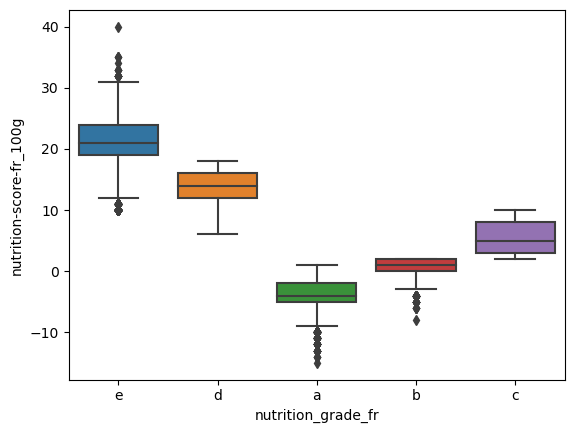

In [64]:
sns.boxplot(data= new_data2,y='nutrition-score-fr_100g',x='nutrition_grade_fr')

In [662]:
# fichier dédier à l'analyse univarié, bivarié et multivarié
new_data2.to_csv('Cleaned/exploratory_data_analisis3.csv')